In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(0)
p = np.array([1/4, 1/4, 1/2])
x = np.random.multinomial(20, p, size=1000)

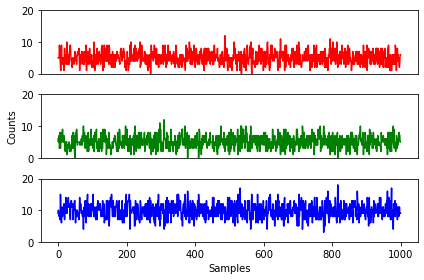

In [3]:
fig, ax = plt.subplots(3, 1)
ax[0].plot(x[:, 0], c='r')
ax[0].set_xticks([])
ax[0].set_ylim([0, 20])
ax[1].plot(x[:, 1], c='g')
ax[1].set_xticks([])
ax[1].set_ylim([0, 20])
ax[2].plot(x[:, 2], c='b')
ax[2].set_xlabel('Samples')
ax[2].set_ylim([0, 20])
ax[1].set_ylabel('Counts')

plt.tight_layout()


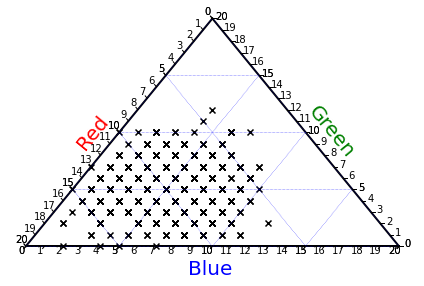

In [4]:
import ternary


## Boundary and Gridlines
scale = 20
figure, tax = ternary.figure(scale=scale)

# Draw Boundary and Gridlines
tax.boundary(linewidth=2.0)
tax.ticks(axis='lbr', linewidth=1, multiple=5)
tax.gridlines(multiple=5, color="blue")

# Set Axis labels and Title
fontsize = 20
tax.left_axis_label("Red", fontsize=fontsize, fontdict={'color':  'red'})
tax.right_axis_label("Green", fontsize=fontsize, fontdict={'color':  'green'})
tax.bottom_axis_label("Blue", fontsize=fontsize, fontdict={'color':  'blue'})

# Set ticks
tax.ticks(axis='lbr', linewidth=1)

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()

tax.scatter(x, marker='x', color='black', label="Red Squares")
plt.axis('off')
plt.tight_layout()


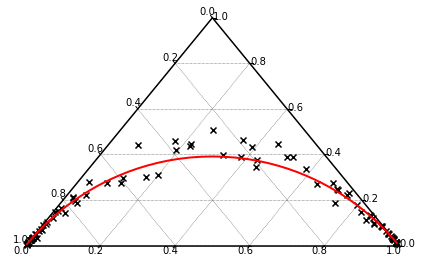

In [7]:
from skbio.stats.composition import alr_inv
n = 100
eps = np.random.randn(n)

figure, tax = ternary.figure(scale=1.0)
tax.boundary()
tax.gridlines(multiple=0.2, color="black")
    
t = np.linspace(-10, 10, n)
y1 = 0.5 - 1 * t
y2 = 0.5 - 0.5 * t
y = np.vstack((y2, y1)).T

tax.plot(alr_inv(y).tolist(), linewidth=2.0, label="Fit", color='red')
tax.ticks(axis='lbr', multiple=0.2, linewidth=1, tick_formats="%.1f")
#tax.legend()

x1 = 0.5 - 1 * t + 0.3 * np.random.randn(n)
x2 = 0.5 - 0.5 * t + 0.3 * np.random.randn(n)
x = np.vstack((x2, x1)).T
tax.scatter(alr_inv(x), marker='x', color='black', label="Red Squares")

plt.axis('off')
plt.tight_layout()

Text(0, 0.5, '$log(x_2/x_3)$')

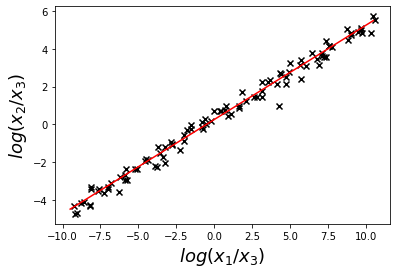

In [28]:
plt.scatter(x1, x2, marker='x', c='k')
plt.plot(y1, y2, c='r')
plt.xlabel('$log(x_1/x_3)$', fontsize=18)
plt.ylabel('$log(x_2/x_3)$', fontsize=18)

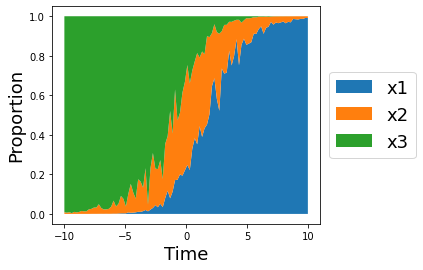

In [26]:
xp = alr_inv(x)
fig, ax = plt.subplots()
ax.fill_between(t, xp[:, 0], label='x1')
ax.fill_between(t, xp[:, 0], xp[:, 0] + xp[:, 1], label='x2')
ax.fill_between(t, xp[:, 0] + xp[:, 1], xp[:, 0] + xp[:, 1] + xp[:, 2], label='x3')
ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Proportion', fontsize=18)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)

# Differential Abundance example

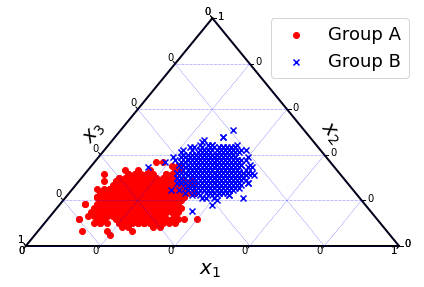

In [57]:
import ternary
from skbio.stats.composition import closure


np.random.seed(0)
p1 = np.array([1/5, 1/5, 3/5])
p2 = np.array([1/3, 1/3, 1/3])

x1 = np.random.multinomial(60, p1, size=1000)
x2 = np.random.multinomial(90, p2, size=1000)


## Boundary and Gridlines
scale = 1
figure, tax = ternary.figure(scale=scale)

# Draw Boundary and Gridlines
tax.boundary(linewidth=2.0)
tax.ticks(axis='lbr', linewidth=1, multiple=0.2)
tax.gridlines(multiple=0.2, color="blue")

# Set Axis labels and Title
fontsize = 20
tax.left_axis_label("$x_3$", fontsize=fontsize, fontdict={'color':  'black'})
tax.right_axis_label("$x_2$", fontsize=fontsize, fontdict={'color':  'black'})
tax.bottom_axis_label("$x_1$", fontsize=fontsize, fontdict={'color':  'black'})

# Set ticks
tax.ticks(axis='lbr', linewidth=1)

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()

tax.scatter(closure(x1), marker='o', color='r', label="Group A")
tax.scatter(closure(x2), marker='x', color='b', label="Group B")

plt.axis('off')
plt.tight_layout()
plt.legend(fontsize=18)


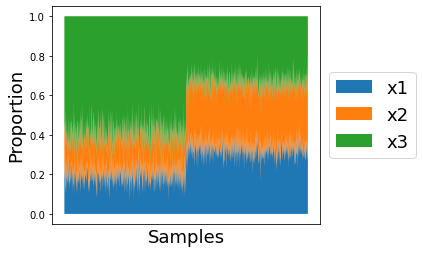

In [58]:
#idx = np.argsort(x1[:, 2])
#x1 = x1[idx]
#idx = np.argsort(x2[:, 2])
#x2 = x2[idx]

xp = np.vstack((closure(x1), closure(x2)))
fig, ax = plt.subplots()
t = np.arange(len(xp))
ax.fill_between(t, xp[:, 0], label='x1')
ax.fill_between(t, xp[:, 0], xp[:, 0] + xp[:, 1], label='x2')
ax.fill_between(t, xp[:, 0] + xp[:, 1], xp[:, 0] + xp[:, 1] + xp[:, 2], label='x3')
ax.set_xlabel('Samples', fontsize=18)
ax.set_ylabel('Proportion', fontsize=18)
ax.set_xticks([])
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)